In [1]:
import torchvision

resnet18 = torchvision.models.resnet18(pretrained=True)

In [2]:
# load model
import torch

resnet18.load_state_dict(torch.load('resnet18.ckpt'))

In [3]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor()])

testset = datasets.ImageFolder(root='4classes/test', transform=transform)
testset_loader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

device  = torch.device('cuda: 1' if torch.cuda.is_available() else 'cpu')
resnet18 = resnet18.to(device)

resnet18.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testset_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  
    print('Accuracy: {}/{} = {} %'.format(correct, total, 100 * correct / total))

Accuracy: 395/400 = 98.75 %


(1366, 768)
RGB


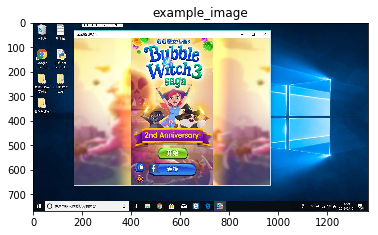

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

example_image = '4classes/test/game/20190215160936.jpg'
img = Image.open(example_image)
print(img.size)
print(img.mode)

%matplotlib inline 
plt.imshow(img)
plt.axis('on')
plt.title('example_image')
plt.show()

In [5]:
print(type(img))
img = transform(img)
print(img.size())
img = torch.unsqueeze(img, 0)
img = img.to(device)
_, predicted = torch.max(resnet18(img).data, 1)
print(predicted)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
torch.Size([3, 768, 1366])
tensor([0], device='cuda:1')


In [6]:
print(predicted.item())
print(testset.class_to_idx)

0
{'game': 0, 'microbit': 1, 'other': 2, 'scratch': 3}
